In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stat
from sklearn.preprocessing import StandardScaler
pd.pandas.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearnarn import preprocessing

In [2]:
df=pd.read_csv('train (1).csv')

In [3]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Categorical Features

In [5]:
categorical_features=[features for features in df.columns if df[features].dtypes=='object']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Numerical Features

In [6]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Creating some new variables


In [7]:
# Extracting Titles fron names
list1=[]
k=0
for j in df.Name:
    
    list1.append(str(j).split()[1])
    k+=1
    

In [8]:
df['Title']=list1
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr.


In [9]:
# Family Size
df['Family_size']=df['SibSp']+df['Parch']+1
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr.,2


In [10]:
# Age groups
list2=df.Age.tolist()
list3=['teen-age' if z<18 else 'adult' if z<60 else 'old' for z in list2]
df['Age_group']=list3
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr.,2,adult


# Missing values

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Family_size      0
Age_group        0
dtype: int64

In [12]:
mode=df.Embarked.value_counts().index[0]
df['Embarked'].fillna(mode,inplace=True)

In [13]:
# for Age column we will use random sample imputer
def impute_age(df,variable):
    df[variable+'random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'random']=random_sample

In [14]:
impute_age(df,'Age')

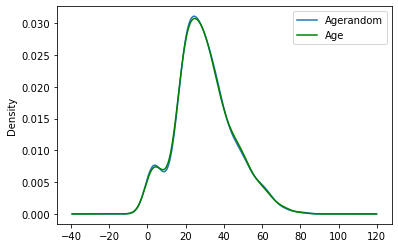

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Agerandom'].plot(kind='kde', ax=ax)
df.Age.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


#### this figure shows that imputing missing values with random samples has not changed the distribution of data


In [16]:
# extracting the cabin names
list4=[]
df['Cabin']=df["Cabin"].astype(str)
for z in df['Cabin']:
    list4.append(str(z.split()[0][0]))
    

In [17]:
df['Cabin_new']=list4

In [18]:
df.Cabin_new.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_new, dtype: int64

In [19]:
# since m indicates missing values we will replace it by missing
df['Cabin_new'].replace('n','missing',inplace=True)

# Visualization

0    549
1    342
Name: Survived, dtype: int64


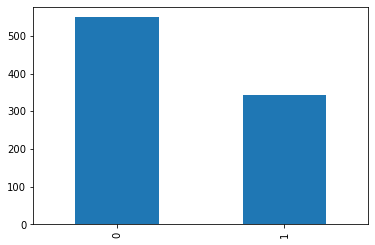

In [20]:
df.Survived.value_counts().plot(kind='bar')
print(df.Survived.value_counts())

male      577
female    314
Name: Sex, dtype: int64


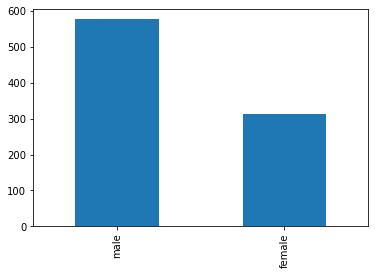

In [21]:
df.Sex.value_counts().plot(kind='bar')
print(df.Sex.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


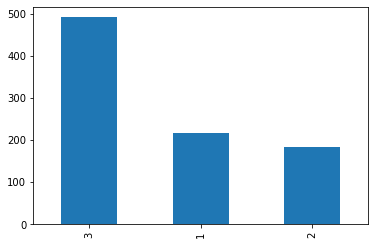

In [22]:
df.Pclass.value_counts().plot(kind='bar')
print(df.Pclass.value_counts())

missing    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin_new, dtype: int64


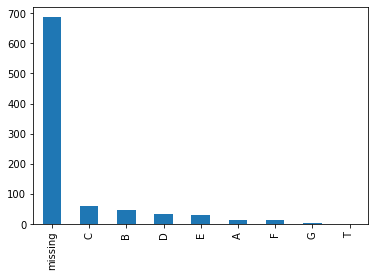

In [23]:
df.Cabin_new.value_counts().plot(kind='bar')
print(df.Cabin_new.value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


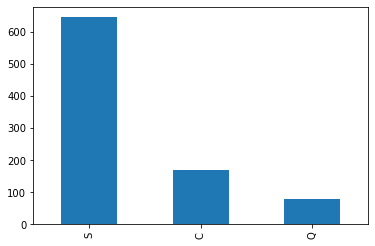

In [24]:
df.Embarked.value_counts().plot(kind='bar')
print(df.Embarked.value_counts())

Mr.        502
Miss.      179
Mrs.       121
Master.     40
Dr.          7
Rev.         6
y            4
Planke,      3
Impe,        3
Gordon,      2
Name: Title, dtype: int64


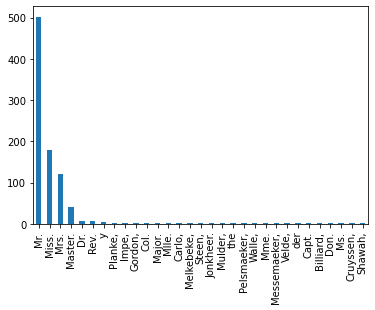

In [25]:
df.Title.value_counts().plot(kind='bar')
print(df.Title.value_counts().head(10))

adult       575
old         203
teen-age    113
Name: Age_group, dtype: int64


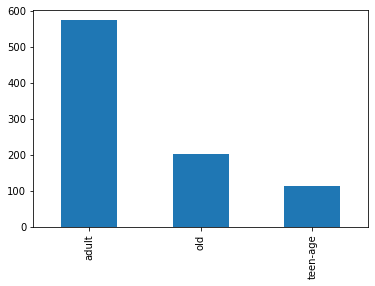

In [26]:
df.Age_group.value_counts().plot(kind='bar')
print(df.Age_group.value_counts())

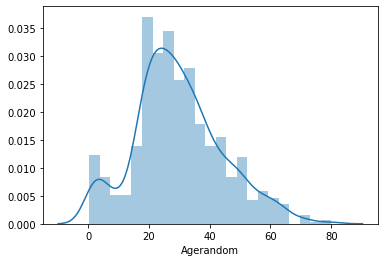

In [27]:
sns.distplot(df.Agerandom)

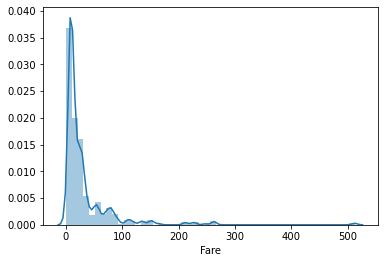

In [28]:
sns.distplot(df.Fare)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


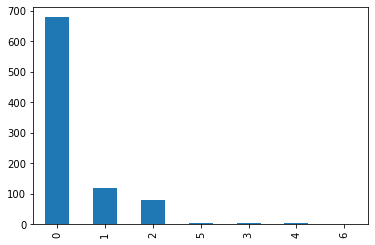

In [29]:
df.Parch.value_counts().plot(kind='bar')
print(df.Parch.value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


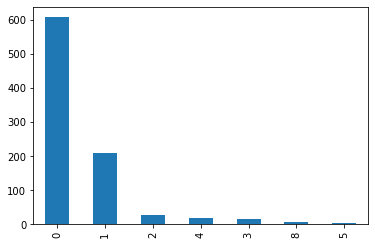

In [30]:
df.SibSp.value_counts().plot(kind='bar')
print(df.SibSp.value_counts())

adult       575
old         203
teen-age    113
Name: Age_group, dtype: int64


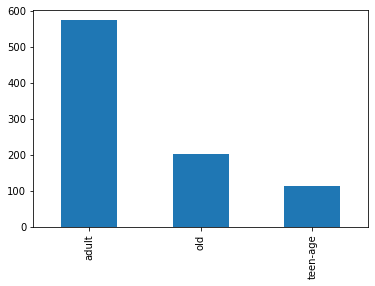

In [31]:
df.Age_group.value_counts().plot(kind='bar')
print(df.Age_group.value_counts())

# Bivariate Analysis

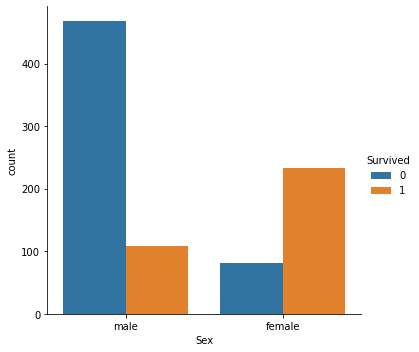

In [32]:
sns.catplot(x = 'Sex', hue = 'Survived',data = df, kind = 'count')

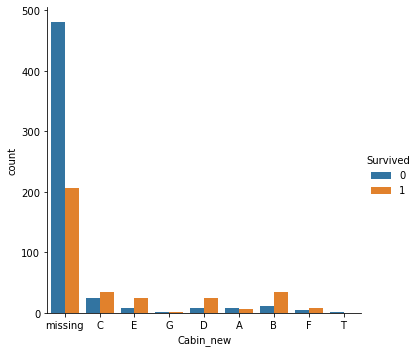

In [33]:
sns.catplot(x = 'Cabin_new', hue = 'Survived',data = df, kind = 'count')

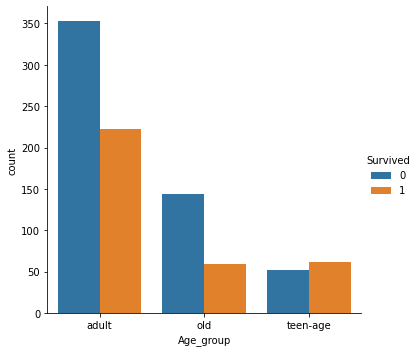

In [34]:
sns.catplot(x = 'Age_group', hue = 'Survived',data = df, kind = 'count')

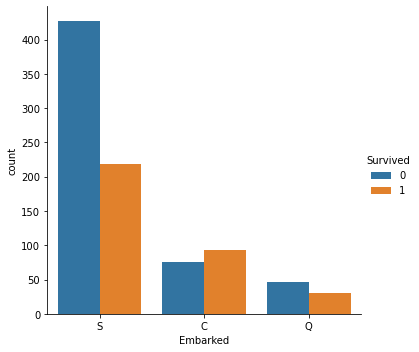

In [35]:
sns.catplot(x = 'Embarked', hue = 'Survived',data = df, kind = 'count')

# Encoding

In [38]:
# Pclass
label_encoder = preprocessing.LabelEncoder() 
df['Pclass']=label_encoder.fit_transform(df['Pclass'])

In [39]:
# Sex
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [40]:
# Embarked
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [41]:
# titles
### since we have a lot of titles so we will take top 4 and mark rest as 0
most_frequent_titles=df.Title.value_counts().sort_values(ascending=False).head(4).index
most_frequent_titles=list(most_frequent_titles)
most_frequent_titles

['Mr.', 'Miss.', 'Mrs.', 'Master.']

In [42]:
for titles in most_frequent_titles:
    df[titles]=np.where(df['Title']==titles,1,0)

In [43]:
# Age group
age_group=pd.get_dummies(df['Age_group'],drop_first=True)

In [44]:
#cabin
cabin=pd.get_dummies(df['Cabin_new'],drop_first=True)


In [45]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_group,Agerandom,Cabin_new,Mr.,Miss.,Mrs.,Master.
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,nan,S,Mr.,2,adult,22.0,missing,1,0,0,0


In [46]:
df.drop(['PassengerId','Name','Sex','Ticket','Embarked','Cabin','Title','Age_group','Cabin_new','Age'],axis=1,inplace=True)

In [47]:
df=pd.concat([df,age_group,cabin,Embarked,sex],axis=1)

In [48]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Family_size,Agerandom,Mr.,Miss.,Mrs.,Master.,old,teen-age,B,C,D,E,F,G,T,missing,Q,S,male
0,0,2,1,0,7.2500,2,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,1,0,1,0,71.2833,2,38.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2,0,0,7.9250,1,26.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,0,1,0,53.1000,2,35.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,2,0,0,8.0500,1,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [71]:
df.shape

(891, 24)

# Hyper parameter optimizaton

In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [51]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [52]:
X=df.iloc[:,1:]
y=df.iloc[:,0]
X.shape
y.shape

(891,)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
print('the shape of x_train is {}'.format(X_train.shape))
print('the shape of x_test is {}'.format(X_test.shape))
print('the shape of y_train is {}'.format(y_train.shape))
print('the shape of y_test is {}'.format(y_test.shape))

the shape of x_train is (596, 23)
the shape of x_test is (295, 23)
the shape of y_train is (596,)
the shape of y_test is (295,)


In [55]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, verbose=2)

In [56]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [57]:
rf_random.best_score_

0.8406862745098038

In [58]:
pred=rf_random.predict(X_test)

In [59]:
confusion_matrix(y_test,pred)

array([[156,  19],
       [ 34,  86]], dtype=int64)

In [60]:
accuracy_score(y_test,pred)

0.8203389830508474

# Retraining whole train dataset for more accuracy

In [61]:
rf_random.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, verbose=2)

# Loading Test Data

In [348]:
df_test=pd.read_csv('test (1).csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [349]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [350]:
df_PassengerId=pd.DataFrame(df_test.PassengerId)

In [356]:
df_PassengerId.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [315]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Adding Features

In [316]:
# Extracting Titles fron names
list5=[]
a=0
for b in df_test.Name:
    
    list5.append(str(b).split()[1])
    a+=1
    

In [317]:
df_test['Title']=list5
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.


In [318]:
# Family Size
df_test['Family_size']=df_test['SibSp']+df_test['Parch']+1
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.,1


In [319]:
# Age groups
list6=df_test.Age.tolist()
list7=['teen-age' if z<18 else 'adult' if z<60 else 'old' for z in list6]
df_test['Age_group']=list7
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.,1,adult


In [320]:
# extracting the cabin names
list8=[]
df_test['Cabin']=df_test["Cabin"].astype(str)
for l in df_test['Cabin']:
    list8.append(str(l.split()[0][0]))

In [321]:
df_test['Cabin_new']=list8

In [322]:
# since m indicates missing values we will replace it by missing
df_test['Cabin_new'].replace('n','missing',inplace=True)

In [323]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_group,Cabin_new
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,nan,Q,Mr.,1,adult,missing


In [324]:
df_test.shape

(418, 15)

In [325]:
# since train data has age as randomage so we will rename test data to random age
df_test['Agerandom']=df_test['Age']

In [326]:
df.head(1)

,Survived,Pclass,SibSp,Parch,Fare,Family_size,Agerandom,Mr.,Miss.,Mrs.,Master.,old,teen-age,B,C,D,E,F,G,T,missing,Q,S,male
0,0,2,1,0,7.25,2,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


# Imputing Missing Values

In [327]:
impute_age(df_test,'Age')

In [328]:
mode1=df_test.Embarked.value_counts().index[0]
df_test['Embarked'].fillna(mode1,inplace=True)

In [329]:
# since m indicates missing values we will replace it by missing
df_test['Cabin_new'].replace('n','missing',inplace=True)

In [330]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

# Encoding

In [331]:
# Pclass
df_test['Pclass']=label_encoder.fit_transform(df_test['Pclass'])

In [332]:
# Sex
sex=pd.get_dummies(df_test['Sex'],drop_first=True)

In [333]:
# Embarked
Embarked=pd.get_dummies(df_test['Embarked'],drop_first=True)

In [334]:
# titles
### since we have a lot of titles so we will take top 4 and mark rest as 0
most_frequent_titles=df_test.Title.value_counts().sort_values(ascending=False).head(4).index
most_frequent_titles=list(most_frequent_titles)
most_frequent_titles

['Mr.', 'Miss.', 'Mrs.', 'Master.']

In [335]:
for titles in most_frequent_titles:
    df_test[titles]=np.where(df_test['Title']==titles,1,0)

In [336]:
# Age group
age_group=pd.get_dummies(df_test['Age_group'],drop_first=True)

In [337]:
#cabin
cabin=pd.get_dummies(df_test['Cabin_new'],drop_first=True)
df_test['T']=0

In [338]:
df_test=pd.concat([df_test,age_group,cabin,Embarked,sex],axis=1)

In [339]:
df_test.drop(['PassengerId','Name','Sex','Ticket','Embarked','Cabin','Title','Age_group','Cabin_new','Age'],axis=1,inplace=True)

In [340]:
pred_test=rf_random.predict(df_test)

In [341]:
pred_test.shape

(418,)

In [346]:
df_pred=pd.DataFrame(pred_test)

In [354]:
df_pred

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [359]:
df_submission=pd.concat([df_PassengerId,df_pred],axis=1)

In [361]:
df_submission.to_csv('submission.csv', index=False)